In [12]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from apikeys import gkey
import gmaps


In [13]:
# Read in the city scores data set
city_scores = pd.read_csv('../project1/csvs/city_scores.csv')
city_scores.head()

,City,Housing,Cost of Living,Startups,Travel Connectivity,Commute,Safety,Healthcare,Education,Environmental Quality,Taxation,Internet Access,lat,lng,Overall
0,"New York, NY",1.0000,2.342,10.0000,6.6750,5.51925,7.022,8.501667,8.0935,5.23375,3.9205,7.0985,40.6943,-73.9249,5.946015
1,"Los Angeles, CA",1.5275,4.556,10.0000,3.9585,3.67700,5.705,8.439667,8.6245,4.73150,4.7675,5.4965,34.1141,-118.4068,5.589424
2,"Chicago, IL",3.7020,4.766,9.5130,5.5075,4.57975,3.832,8.555000,7.9990,6.80450,4.0620,6.5995,41.8375,-87.6866,5.992750
3,"Miami, FL",3.0310,4.497,8.0225,4.1690,4.05275,4.321,8.529000,4.3945,6.29200,4.7720,5.8240,25.7840,-80.2101,5.264068
4,"Dallas, TX",5.2590,6.091,7.9395,4.7465,4.47050,4.339,8.439333,4.2840,6.69300,4.7720,6.4610,32.7935,-96.7667,5.772258


# Background:
* The primary reason taylor wants to leave California is because it's too expensive to live here.  
* The cost of living is too high. What city has the lowest cost of living?
* That's simple enough, but there are many things affecting Taylor's choice too. She wants to know if the lower cost of living means sacrificing the safety of the surrounding area.
?Is cost of living inversely correlated to a city's safety? What potential (real world) reasons would cause a low cost of living to be safe/unsafe and is this correlation strong or just moderate?
* Cost of living is not just affected by physical safety, but also associated with environmental safety and quality.
* If the environmental quality of a city is low, would that drive people away and lower the cost of living as a result?

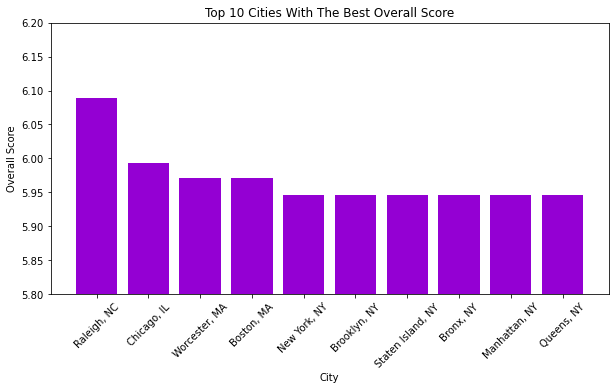

In [14]:
# Top Cities by Overall Score
top_ov = city_scores.sort_values('Overall', ascending=False).head(10)
x_axis = np.arange(len(top_ov))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,5)).patch.set_facecolor('white')
plt.bar(top_ov['City'],top_ov['Overall'],align="center",color='darkviolet')
plt.title("Top 10 Cities With The Best Overall Score")
plt.ylim(5.8,6.2)
plt.xlabel('City')
plt.ylabel('Overall Score')
plt.xticks(tick_locations, top_ov["City"], rotation=45)
plt.savefig("Images/Top10overall.png", bbox_inches="tight")
plt.show()

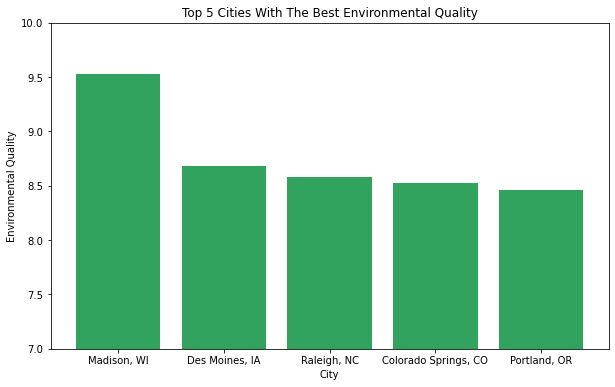

In [15]:
# Environmental Quality Chart
top_env = city_scores.sort_values('Environmental Quality', ascending=False).head(5)
x_axis = np.arange(len(top_env))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,6)).patch.set_facecolor('white')
plt.bar(top_env['City'],top_env['Environmental Quality'],align="center",color=(.1,.6,.3,.9))
plt.title("Top 5 Cities With The Best Environmental Quality")
plt.ylim(7,10)
plt.xlabel('City')
plt.ylabel('Environmental Quality')
plt.xticks(tick_locations, top_env["City"], rotation=0)
plt.savefig("Images/EnvironmentalQuality.png")
plt.show()

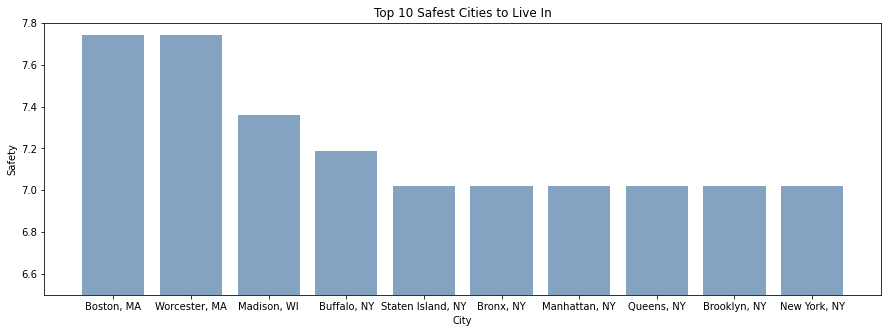

In [16]:
# Top 10 Safe Cities Chart
top_safe = city_scores.sort_values('Safety', ascending=False).head(10)
x_axis = np.arange(len(top_safe))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(15,5)).patch.set_facecolor('white')
plt.bar(top_safe['City'],top_safe['Safety'],align="center", color=(.2,.4,.6,.6))
plt.title("Top 10 Safest Cities to Live In")
plt.ylim(6.5,7.8)
plt.xlabel('City')
plt.ylabel('Safety')
plt.xticks(tick_locations, top_safe["City"])
plt.savefig("Images/Safety.png")
plt.show()

# Question:

What are the least safe cities to move to?


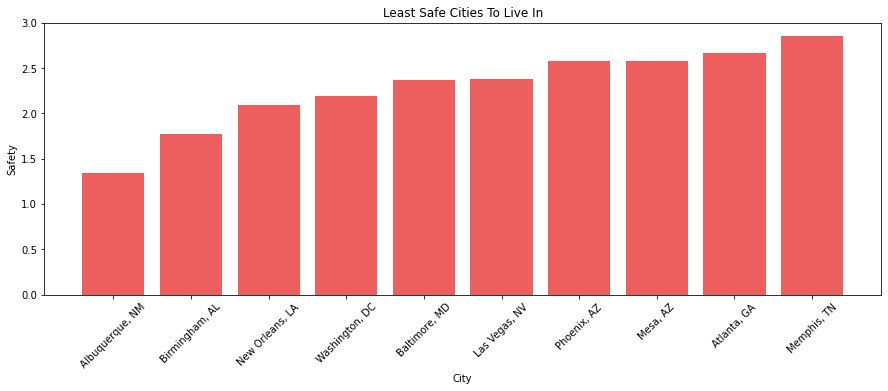

In [17]:
# Top 10 Unsafe Cities Chart
top_safe = city_scores.sort_values('Safety', ascending=True).head(10)
x_axis = np.arange(len(top_safe))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(15,5)).patch.set_facecolor('white')
plt.bar(top_safe['City'],top_safe['Safety'],align="center", color=(.9,.1,.1,.7))
plt.title("Least Safe Cities To Live In")
plt.xlabel('City')
plt.ylabel('Safety')
plt.xticks(tick_locations, top_safe["City"], rotation=45)
plt.savefig("Images/NotSafe.png", bbox_inches="tight")
plt.show()

# Question: 
Is environmental quality related to healthcare? Do places with a better environmental quality have a better healthcare?

The correlation between healthcare and environmental quality is 0.54


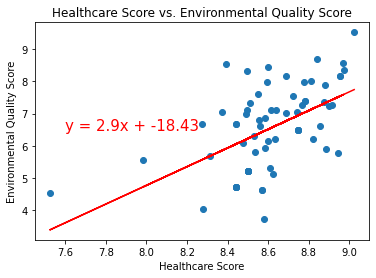

In [18]:
plt.figure().patch.set_facecolor('white')
plt.scatter(city_scores['Healthcare'], city_scores['Environmental Quality'])
plt.xlabel("Healthcare Score")
plt.ylabel("Environmental Quality Score")
plt.title("Healthcare Score vs. Environmental Quality Score")
correlation = st.pearsonr(city_scores['Healthcare'],city_scores['Environmental Quality'])

slope, intcp, r, p, std_err = st.linregress(
    city_scores['Healthcare'],city_scores['Environmental Quality'])
reg = slope * city_scores['Healthcare'] + intcp
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intcp,2))
plt.plot(city_scores['Healthcare'], reg, color='red')
plt.annotate(line_eq,(7.6, 6.5),fontsize=15,color="red")
print(f"The correlation between healthcare and environmental quality is {round(correlation[0],2)}")
plt.savefig("Images/EnvVsHealth.png")

# Question:
Is housing related to cost of living?

The correlation between Housing and Cost of Living is 0.81


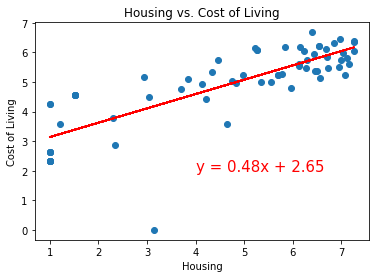

In [19]:
plt.figure().patch.set_facecolor('white')
plt.scatter(city_scores['Housing'], city_scores['Cost of Living'])
plt.xlabel("Housing")
plt.ylabel("Cost of Living")
plt.title("Housing vs. Cost of Living")
correlation = st.pearsonr(city_scores['Housing'],city_scores['Cost of Living'])

slope, intcp, r, p, std_err = st.linregress(
    city_scores['Housing'],city_scores['Cost of Living'])
reg = slope * city_scores['Housing'] + intcp
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intcp,2))
plt.plot(city_scores['Housing'], reg, color='red')
plt.annotate(line_eq,(4, 2),fontsize=15,color="red")
print(f"The correlation between Housing and Cost of Living is {round(correlation[0],2)}")
plt.savefig("Images/HousingVsCost.png")

## Box plots
There seems to be an outlier with cost of living, can we trust that data point?

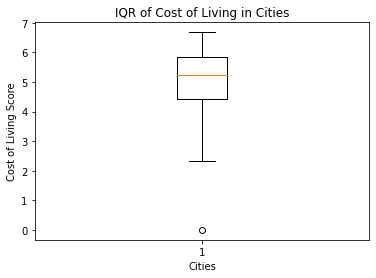

The lower quartile is: 4.44075
The upper quartile is: 5.84025
The interquartile range is: 1.3994999999999997
The the median is: 5.234500000000001 
Number of outliers = 1


In [20]:
cost_living = city_scores['Cost of Living']

fig1, ax1 = plt.subplots()
fig1.patch.set_facecolor('white')
ax1.set_title('IQR of Cost of Living in Cities')
ax1.set_ylabel('Cost of Living Score')
ax1.set_xlabel('Cities')
ax1.boxplot(cost_living)
plt.savefig('Images/City_Cost_of_Lving_IQR.png')
plt.show()
quartiles = cost_living.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
num_of_outliers = len(city_scores.loc[(city_scores['Cost of Living']<lower_bound) | (city_scores['Cost of Living']>upper_bound)])
print(f"Number of outliers = {num_of_outliers}")

# Grouped Bar Charts

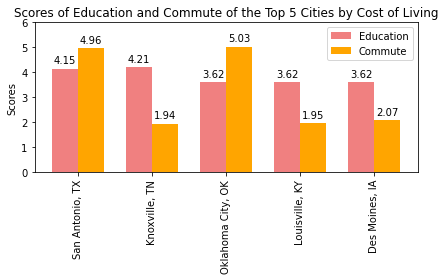

In [31]:
top_cost = city_scores.sort_values('Cost of Living', ascending=False).head(5)
labels = top_cost['City']
edu_scores = round(top_cost['Education'],2)
commute_scores = round(top_cost['Commute'],2)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
rects1 = ax.bar(x - width/2, edu_scores, width, label='Education', color='lightcoral')
rects2 = ax.bar(x + width/2, commute_scores, width, label='Commute', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores of Education and Commute of the Top 5 Cities by Cost of Living')
ax.set_xticks(x, labels, rotation = 90)
ax.set_ylim(0,6)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig("Images/EducationVsCommute.png", bbox_inches="tight")
plt.show()

# Heatmap of Overall Scores

In [28]:
gmaps.configure(api_key=gkey)
# Plot Heatmap

fig = gmaps.figure()
locations = city_scores[['lat','lng']]
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=city_scores['Overall'], 
                                 dissipating=False, max_intensity=10,
                                 point_radius=2)


# Add layer
fig.add_layer(heat_layer)
fig.
fig

Figure(layout=FigureLayout(height='420px'))